<a href="https://colab.research.google.com/github/utsavbheda13/CE011_UtsavBheda_ML/blob/main/Lab08/011_Lab_08_1_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare Data

In [ ]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)


(569, 30)
(569,)


# K-Mean Model

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=11)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[9 9 1 0 1 5 1 5 5 5 2 8 8 2 5 2 2 8 9 5 0 7 2 6 9 8 2 8 8 8 1 5 8 1 8 8 5
 0 5 5 5 0 1 5 5 1 7 5 0 5 0 5 0 8 2 0 9 2 0 7 7 7 2 7 5 2 7 0 7 0 1 7 1 5
 0 8 0 1 1 0 0 0 6 8 0 1 5 1 0 5 5 5 5 5 2 1 0 7 0 5 5 7 0 7 7 5 0 0 6 0 7
 0 5 7 7 0 7 2 8 8 0 1 6 5 0 5 5 1 5 1 0 2 8 2 1 0 0 0 2 7 7 8 0 0 7 0 0 5
 5 5 0 7 7 7 5 0 8 2 0 0 0 1 9 0 6 5 7 8 1 5 0 2 2 7 7 7 7 2 0 0 4 9 8 0 2
 7 8 0 0 0 5 0 7 5 5 0 5 8 1 2 0 8 9 2 0 2 7 8 0 2 1 0 6 2 5 5 0 7 9 9 5 5
 7 2 5 5 7 5 0 5 8 0 0 9 7 5 4 1 5 8 5 0 0 5 1 7 0 0 7 0 9 0 9 8 9 5 9 2 8
 2 9 8 8 2 8 4 7 5 0 7 5 0 6 7 8 0 0 8 5 5 1 0 1 2 0 0 0 0 7 0 5 5 0 0 0 5
 7 0 5 7 9 0 1 7 0 0 0 7 5 5 0 5 0 0 7 0 0 8 7 0 7 1 0 9 0 0 5 0 2 2 2 0 7
 0 0 8 0 1 7 4 5 7 7 1 0 7 0 2 0 0 0 2 4 2 0 0 0 5 7 7 0 0 0 2 5 1 1 0 4 9
 8 5 1 9 5 2 7 5 5 0 0 7 0 0 0 5 0 5 0 8 7 7 8 9 0 5 5 0 0 0 8 0 0 0 0 0 2
 0 8 0 0 0 7 2 2 0 7 1 0 0 0 5 0 5 7 7 7 0 7 0 5 0 1 1 5 5 0 5 5 5 0 8 5 7
 8 0 8 5 5 9 0 1 0 5 0 5 0 0 0 7 1 3 5 0 5 5 5 7 8 0 7 0 2 0 7 0 5 5 0 2 0
 5 5 5 2 0 5 1 0 2 0 8 8 

#Scatter plot of the data points

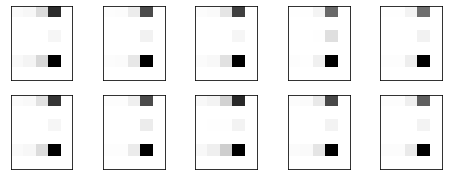

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

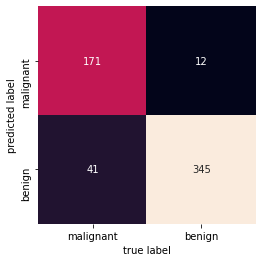

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');